<a href="https://colab.research.google.com/github/minakshimohanty/Diabetic-Retinopathy-Detection/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [0]:
X_train = np.load('/content/drive/My Drive/Capstone 1/train_data_224.npy')
y_train = np.load('/content/drive/My Drive/Capstone 1/train_labels_224.npy')
X_test = np.load('/content/drive/My Drive/Capstone 1/test_data_224.npy')
y_test = np.load('/content/drive/My Drive/Capstone 1/test_labels_224.npy')

In [5]:
X_train.shape

(2563, 224, 224, 3)

In [6]:
y_train.shape

(2563,)

In [7]:
X_test.shape

(1099, 224, 224, 3)

In [8]:
y_test.shape

(1099,)

In [9]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Using TensorFlow backend.


In [0]:
import keras
from tensorflow.python.keras.models import Sequential,Input,Model
from tensorflow.python.keras.layers import Dense, Dropout, Flatten
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras.layers.normalization import BatchNormalization
from tensorflow.python.keras.layers.advanced_activations import LeakyReLU


In [0]:
batch_size = 128
epochs = 30
num_classes = 5

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(224,224,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(num_classes, activation='softmax'))



In [0]:
#compile model 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 224, 224, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 112, 112, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       7

In [14]:
#train the model
X_train_norm = X_train/255
eyetest_train = model.fit(X_train_norm, y_train, batch_size = batch_size, epochs = epochs, validation_split=0.1) 

Epoch 1/30
19/19 [==============================] - 4s 220ms/step - loss: 1.3556 - accuracy: 0.5325 - val_loss: 0.8006 - val_accuracy: 0.6809
Epoch 2/30
19/19 [==============================] - 3s 145ms/step - loss: 0.8074 - accuracy: 0.6856 - val_loss: 0.6947 - val_accuracy: 0.6848
Epoch 3/30
19/19 [==============================] - 3s 145ms/step - loss: 0.8100 - accuracy: 0.7199 - val_loss: 0.9636 - val_accuracy: 0.7237
Epoch 4/30
19/19 [==============================] - 3s 146ms/step - loss: 0.7370 - accuracy: 0.7160 - val_loss: 0.9311 - val_accuracy: 0.7432
Epoch 5/30
19/19 [==============================] - 3s 145ms/step - loss: 0.7171 - accuracy: 0.7246 - val_loss: 0.6663 - val_accuracy: 0.7315
Epoch 6/30
19/19 [==============================] - 3s 145ms/step - loss: 0.7565 - accuracy: 0.7303 - val_loss: 0.8612 - val_accuracy: 0.7510
Epoch 7/30
19/19 [==============================] - 3s 146ms/step - loss: 0.7110 - accuracy: 0.7346 - val_loss: 0.7533 - val_accuracy: 0.7043
Epoch 

In [15]:
#evaluate model
X_test_norm = X_test/255
eyetest_eval = model.evaluate(X_test_norm, y_test, verbose=0)
print('Test loss:', eyetest_eval[0])
print('Test accuracy:', eyetest_eval[1])

Test loss: 1.0861001014709473
Test accuracy: 0.7088261842727661


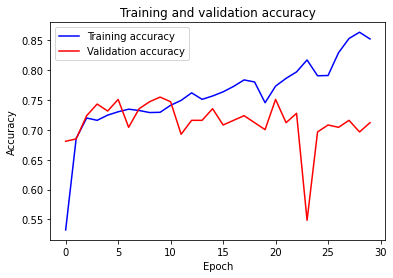

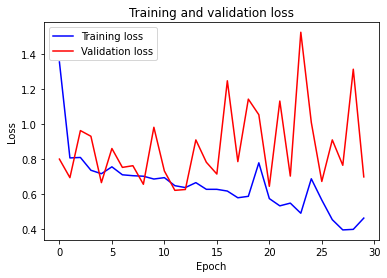

In [16]:
accuracy = eyetest_train.history['accuracy']
loss = eyetest_train.history['loss']
val_accuracy = eyetest_train.history['val_accuracy']
val_loss = eyetest_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [0]:
# predictions
y_pred = model.predict(X_test)

In [0]:
def decode(datum):
    return np.argmax(datum)

In [0]:
y_pred_decoded = []
for i in range(y_pred.shape[0]):
    y_pred_decoded.append(decode(y_pred[i]))
    

In [0]:
y_test_decoded = []
for i in range(y_test.shape[0]):
    y_test_decoded.append(decode(y_test[i]))

In [21]:
from sklearn.metrics import classification_report
target_names = ['No DR', 'Mild', 'Moderate', 'Severe', 'Proliferative DR']
print(classification_report(y_test_decoded, y_pred_decoded, target_names=target_names))

                  precision    recall  f1-score   support

           No DR       0.93      0.93      0.93       540
            Mild       0.42      0.15      0.22        98
        Moderate       0.53      0.80      0.64       302
          Severe       0.13      0.11      0.12        55
Proliferative DR       0.11      0.03      0.05       104

        accuracy                           0.70      1099
       macro avg       0.43      0.40      0.39      1099
    weighted avg       0.66      0.70      0.66      1099



In [22]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test_decoded, y_pred_decoded, labels= [0,1,2,3,4]))

[[502   2  22   4  10]
 [ 10  15  69   0   4]
 [ 19  14 241  23   5]
 [  1   5  38   6   5]
 [  8   0  81  12   3]]
